In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import eazy
from astropy.io import fits
from pathlib import Path

In [33]:
Path('Templates_Test/').symlink_to('C:/Users/namit/eazy-photoz/templates/fsps_full/', target_is_directory=True)

In [31]:
ls C:\Users\namit\eazy-photoz\templates\fsps_full\

 Volume in drive C has no label.
 Volume Serial Number is F673-CB0B

 Directory of C:\Users\namit\eazy-photoz\templates\fsps_full

02/06/2024  03:09 PM    <DIR>          .
02/01/2024  03:21 PM    <DIR>          ..
02/01/2024  03:21 PM               603 fsps_QSF_12_v3.param
02/01/2024  03:21 PM            11,520 fsps_QSF_12_v3.param.fits
02/01/2024  03:21 PM         1,514,880 fsps_QSF_12_v3.sfh.fits
02/01/2024  03:21 PM           240,566 fsps_QSF_12_v3.sfh.png
02/01/2024  03:21 PM           162,536 fsps_QSF_12_v3_001.dat
02/01/2024  03:21 PM           162,537 fsps_QSF_12_v3_002.dat
02/01/2024  03:21 PM           162,540 fsps_QSF_12_v3_003.dat
02/01/2024  03:21 PM           162,543 fsps_QSF_12_v3_004.dat
02/01/2024  03:21 PM           162,540 fsps_QSF_12_v3_005.dat
02/01/2024  03:21 PM           162,539 fsps_QSF_12_v3_006.dat
02/01/2024  03:21 PM           162,525 fsps_QSF_12_v3_007.dat
02/01/2024  03:21 PM           162,526 fsps_QSF_12_v3_008.dat
02/01/2024  03:21 PM           162,527 f

In [2]:
# Get flux type (First page of the file)

flux_type = input('Which flux type?\n')
full_table = fits.open("hlsp_jades_jwst_nircam_goods-s-deep_photometry_v2.0_catalog.fits")
main_file = full_table
main_page_contents = {'Primary': 0, 'FILTERS': 1, 'FLAG': 2, 'SIZE': 3, 'CIRC': 4, 'CIRC_BSUB': 5, 'CIRC_CONV': 6, 'KRON': 7, 'KRON_CONV': 8, 'PHOTOZ': 9}

index = main_page_contents[flux_type]
print(index)
IDs = full_table[index].data['ID']
print(IDs)
headers = full_table[index].header
print(headers)

Which flux type?
KRON
7
[   519    522    528 ... 298460 298461 298462]
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  740 / length of dimension 1                          NAXIS2  =                94000 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                  183 / number of table fields                         TTYPE1  = 'ID      '                                                            TFORM1  = 'J       '                                                            TZERO1  =           2147483648                                                  TTYPE2  = 'RA      '                            

In [3]:
# Index = 4, 5, 6 CIRCs:
if index == 4 or index == 5 or index == 6:
    all_filter_headers = []
    # print(headers[15]) # Filter names start from 15, have 3 things with the same filter and have Es after every, so skip 6 to get the next.
    
    i = int(17)

    while i < len(headers):

        filter_header = headers[i]
        # print(filter_header)
        all_filter_headers.append(filter_header)
        i = i + 14
        
    #print(all_filter_headers)

    j = int(0)

    flux_error_headers = []

    while j < len(all_filter_headers):

        flux_error_header = all_filter_headers[j]

        if 'e' in flux_error_header and 'ei' not in flux_error_header:
            flux_error_headers.append(flux_error_header)

        j = j + 1
    
    # print(flux_error_headers)
    
    k = int(0)
    filter_names = []
    flux_headers = []
    while k < len(flux_error_headers):
        filter_name = flux_error_headers[k]
        flux_headers.append(flux_error_headers[k].strip('_e'))
        filter_name = filter_name.strip('_CIRC0_e')
        # print(filter_name)
        filter_names.append(filter_name)

        k = k + 1

    print(filter_names)
    print('\n')
    print(flux_headers)
    print('\n')
    print(flux_error_headers)

In [4]:
# Index = 7, 8 KRONs:
if index == 7 or index == 8:
    all_filter_headers = []
    # print(headers[15]) # Filter names start from 15, have 3 things with the same filter and have Es after every, so skip 6 to get the next.

    i = int(15)

    while i < len(headers):

        filter_header = headers[i]
        # print(filter_header)
        all_filter_headers.append(filter_header)
        i = i + 6

    # print(all_filter_headers)

    j = int(0)

    flux_error_headers = []

    while j < len(all_filter_headers):

        flux_error_header = all_filter_headers[j]

        if 'e' in flux_error_header and 'ei' not in flux_error_header:
            flux_error_headers.append(flux_error_header)

        j = j + 1

    # print(flux_error_headers)

    k = int(0)
    filter_names = []
    flux_headers = []
    while k < len(flux_error_headers):
        filter_name = flux_error_headers[k]
        flux_headers.append(flux_error_headers[k].strip('_e'))
        filter_name = filter_name.strip('_KRON_e')
        # print(filter_name)
        filter_names.append(filter_name)

        k = k + 1

    print(filter_names)
    print('\n')
    print(flux_headers)
    print('\n')
    print(flux_error_headers)

['F090W', 'F115W', 'F150W', 'F182M', 'F200W', 'F210M', 'F277W', 'F335M', 'F356W', 'F410M', 'F430M', 'F444W', 'F460M', 'F480M', 'F435W', 'F606W', 'F775W', 'F814W', 'F850LP', 'F105W', 'F125W', 'F140W', 'F160W']


['F090W_KRON', 'F115W_KRON', 'F150W_KRON', 'F182M_KRON', 'F200W_KRON', 'F210M_KRON', 'F277W_KRON', 'F335M_KRON', 'F356W_KRON', 'F410M_KRON', 'F430M_KRON', 'F444W_KRON', 'F460M_KRON', 'F480M_KRON', 'F435W_KRON', 'F606W_KRON', 'F775W_KRON', 'F814W_KRON', 'F850LP_KRON', 'F105W_KRON', 'F125W_KRON', 'F140W_KRON', 'F160W_KRON']


['F090W_KRON_e', 'F115W_KRON_e', 'F150W_KRON_e', 'F182M_KRON_e', 'F200W_KRON_e', 'F210M_KRON_e', 'F277W_KRON_e', 'F335M_KRON_e', 'F356W_KRON_e', 'F410M_KRON_e', 'F430M_KRON_e', 'F444W_KRON_e', 'F460M_KRON_e', 'F480M_KRON_e', 'F435W_KRON_e', 'F606W_KRON_e', 'F775W_KRON_e', 'F814W_KRON_e', 'F850LP_KRON_e', 'F105W_KRON_e', 'F125W_KRON_e', 'F140W_KRON_e', 'F160W_KRON_e']


In [5]:
# Get filters to use:

filters_to_use = input('Which filters to use?\n')
useful_filter_names = filters_to_use.split(', ')
print(useful_filter_names)

useful_filters = []

p = int(0)

while p < len(useful_filter_names):
    l = int(0)
    while l < len(filter_names):
        filter_name = filter_names[l]
        if useful_filter_names[p] in filter_name:
            useful_filters.append(filter_name)
        l = l + 1
    p = p + 1
print(useful_filters)

Which filters to use?
F090, F150, F444, F160
['F090', 'F150', 'F444', 'F160']
['F090W', 'F150W', 'F444W', 'F160W']


In [6]:
# Get indices of filters from FILTERS.RES.LATEST.info

file_to_find_in = open('FILTER.RES.latest.info', 'r')

lines = []
for i in range(419):
    line = file_to_find_in.readline()
    lines.append(line)

# print(len(filter_names))
    
j = int(0)
k = int(0)
indices = []

a = int(0)
annotated_all_filter_names = []
# print(len(filter_names))

while a < len(filter_names):
    if 0 <= a <= 13:
        filter_name = 'nrc_' + str.lower(filter_names[a])
    if 14 <= a <= 22:
        filter_name = 'hst_' + str.lower(filter_names[a])
    annotated_all_filter_names.append(filter_name)
    a = a + 1

# print(annotated_all_filter_names)   

annotated_filter_names = []


b = int(0)
while b < len(useful_filters):
    useful_filter = str.lower(useful_filters[b])
    print(useful_filter)
    c = int(0)
    while c < len(annotated_all_filter_names):
        filter_name = annotated_all_filter_names[c]
        if useful_filter in filter_name:
            annotated_filter_names.append(filter_name)  # Adds the instrument title with the filter numbers
        c = c + 1
    b = b + 1

print(annotated_filter_names)            
    



while j < len(annotated_filter_names):
    filter_name = annotated_filter_names[j]
    k = int(0)
    # print(filter_name)
    while k < len(lines):
        if (str(filter_name[4:])) in lines[k] and (str(filter_name[:2])) in lines[k]: # Checks numbers and then nrc or hst
            indices.append(lines[k].split('  ')[0])
            print(filter_name)
            break
        if (str(filter_name[4:])) in lines[k] and 'nircam' in lines[k]:  # Makes sure nircam and not niriss
            indices.append(lines[k].split('  ')[0])
            print(filter_name)
            break
        k = k + 1
    
    j = j + 1

print(indices)
print(len(indices)) # Get this checked with Dr. Hainline (the HST ones), ACS, WFC3, Need 205 instead of 9
file_to_find_in.close()
print(annotated_filter_names)


f090w
f150w
f444w
f160w
['nrc_f090w', 'nrc_f150w', 'nrc_f444w', 'hst_f160w']
nrc_f090w
nrc_f150w
nrc_f444w
hst_f160w
['363', '365', '377', '9']
4
['nrc_f090w', 'nrc_f150w', 'nrc_f444w', 'hst_f160w']


In [7]:
# Write to Z-Phot.translate File:

file_to_write = open('C:/Users/namit/eazy-photoz/inputs/Generalized_Namit_zphot.translate', 'w')

flux_filters = []
flux_errors = []
filter_ids = []
    
l = int(0)

while l < len(annotated_filter_names):
    filter_name = str.lower(annotated_filter_names[l])
    filter_id = indices[l]
    # print(filter_name)
    flux_filters.append('f_' + filter_name[4:])
    flux_errors.append('e_' + filter_name[4:])
    filter_ids.append(filter_id)
    
    file_to_write.write("f_" + filter_name[4:] + ' ' + 'F' + filter_id + '\n')
    file_to_write.write("e_" + filter_name[4:] + ' ' + 'E' + filter_id + '\n')
    l = l + 1
print(flux_filters)
file_to_write.close()
# I should be able to specify filters and then use them instead of using all.

['f_f090w', 'f_f150w', 'f_f444w', 'f_f160w']


In [10]:
# Write headers for Catalog File:

flux_errors_file = open('C:/Users/namit/eazy-photoz/inputs/generalized_flux_and_errors.only', 'w')

i = int(0)

flux_errors_file.write(flux_filters[i] + ' ' + flux_errors[i])
header_line_1 = flux_filters[i] + ' ' + flux_errors[i]

i = i + 1
while i < len(flux_filters):
    header_line_1 = header_line_1 + ' ' + flux_filters[i] + ' ' + flux_errors[i]
    flux_errors_file.write(' ' + flux_filters[i] + ' ' + flux_errors[i])
    i = i + 1

header_line_1 = header_line_1 + ' z_spec'
    
flux_errors_file.write('\n')
    
j = int(0)

flux_errors_file.write('F' + filter_ids[j] + ' ' + 'E' + filter_ids[j])
header_line_2 = 'F' + filter_ids[j] + ' ' + 'E' + filter_ids[j]

j = j + 1
while j < len(filter_ids):
    flux_errors_file.write(' ' + 'F' + filter_ids[j] + ' ' + 'E' + filter_ids[j])
    header_line_2 = header_line_2 + ' ' + 'F' + filter_ids[j] + ' ' + 'E' + filter_ids[j]
    j = j + 1
header_line_2 = header_line_2 + ' z_spec'
print(header_line_1)
print(header_line_2)
# print(flux_filters)
# print(flux_errors)

k = int(0)

while k < len(annotated_filter_names):
    annotated_filter_names[k] = str.upper(annotated_filter_names[k])
    k = k + 1
# print(annotated_filter_names)

f_f090w e_f090w f_f150w e_f150w f_f444w e_f444w f_f160w e_f160w z_spec
F363 E363 F365 E365 F377 E377 F9 E9 z_spec


In [11]:
r = int(0)
useful_flux_headers = []
useful_flux_error_headers = []


while r < len(flux_headers):
    s = int(0)
    while s < len(useful_filters):
        if useful_filters[s] in flux_headers[r]:
            useful_flux_headers.append(flux_headers[r])
        if useful_filters[s] in flux_error_headers[r]:
            useful_flux_error_headers.append(flux_error_headers[r])
        s = s + 1
    r = r + 1
print(useful_flux_headers)
print(useful_flux_error_headers)

flux_headers
flux_error_headers

n = int(0)

fluxes_and_errors = [IDs]

while n < len(useful_flux_headers):
    flux_header = useful_flux_headers[n]
    error_header = useful_flux_error_headers[n]
    fluxes_and_errors.append(full_table[index].data[flux_header])
    fluxes_and_errors.append(full_table[index].data[error_header])
    n = n + 1

# print(fluxes_and_errors)

zspec = []

m = int(0)

while m < len(fluxes_and_errors[0]):
    zspec.append(-9999.0)
    m = m + 1

fluxes_and_errors.append(zspec)

print(fluxes_and_errors)

['F090W_KRON', 'F150W_KRON', 'F444W_KRON', 'F160W_KRON']
['F090W_KRON_e', 'F150W_KRON_e', 'F444W_KRON_e', 'F160W_KRON_e']
[array([   519,    522,    528, ..., 298460, 298461, 298462], dtype=uint32), array([60.952515  , 28.406096  ,  4.927778  , ..., -1.7163218 ,
        4.490082  ,  0.39753437], dtype=float32), array([10.234284  , 10.174142  ,  3.8026161 , ...,  0.85351384,
        1.6842433 ,  1.3936074 ], dtype=float32), array([47.036057  , 17.36899   , -2.0055063 , ...,  1.0853217 ,
       -0.54402596,  0.09655813], dtype=float32), array([8.267682  , 8.065029  , 2.943425  , ..., 0.65213245, 1.0240197 ,
       1.190083  ], dtype=float32), array([30.222227  , 35.22163   ,  6.477728  , ...,  2.8199005 ,
        0.79132044,  5.268279  ], dtype=float32), array([5.122568 , 5.2646513, 2.15149  , ..., 0.7500002, 0.9104968,
       1.1682514], dtype=float32), array([71.30607   , 39.095898  ,  5.950491  , ..., -4.8284464 ,
        0.11197058, -6.280278  ], dtype=float32), array([23.624178 , 23

In [12]:
# Specify Object Ids to fit:

Obj_Ids_to_fit = input('What Object IDs do you want to fit?\n')
useful_object_ids = Obj_Ids_to_fit.split(', ')

h = int(0)
while h < len(useful_object_ids):
    useful_object_ids[h] = int(useful_object_ids[h])
    h = h + 1

#useful_object_ids = [519, 522, 528, 298461, 298462]
indices_using_object_id = []
useful_fluxes_and_errors = [np.array(useful_object_ids)]
print(useful_fluxes_and_errors)
i = int(0)

while i < len(useful_object_ids):
    print(np.where(IDs == useful_object_ids[i])[0][0])
    index_to_get_flux_values_using_object_id = np.where(IDs == useful_object_ids[i])[0]
    indices_using_object_id.append(index_to_get_flux_values_using_object_id)
        
    i = i + 1

j = int(1)
    
while j < len(fluxes_and_errors):
    
    k = int(0)
    intermediate_fluxes_and_errors = []
    while k < len(useful_object_ids):
        index_to_get_flux_values_using_object_id = np.where(IDs == useful_object_ids[k])[0][0]
        flux_and_error_to_use = fluxes_and_errors[j][index_to_get_flux_values_using_object_id]
        intermediate_fluxes_and_errors.append(flux_and_error_to_use)
        k = k + 1
    
    useful_fluxes_and_errors.append(np.array(intermediate_fluxes_and_errors))
    j = j + 1

print(useful_fluxes_and_errors)

# print(indices_using_object_id)
index_to_get_flux_values_using_object_id = np.where(IDs == useful_object_ids[0])[0][0]
#fluxes_and_errors[2][index_to_get_flux_values_using_object_id]

What Object IDs do you want to fit?
751, 528, 519, 522
[array([751, 528, 519, 522])]
14
2
0
1
[array([751, 528, 519, 522]), array([90.4316  ,  4.927778, 60.952515, 28.406096], dtype=float32), array([ 9.856472 ,  3.8026161, 10.234284 , 10.174142 ], dtype=float32), array([99.88616  , -2.0055063, 47.036057 , 17.36899  ], dtype=float32), array([8.101217, 2.943425, 8.267682, 8.065029], dtype=float32), array([100.161385,   6.477728,  30.222227,  35.22163 ], dtype=float32), array([5.8236637, 2.15149  , 5.122568 , 5.2646513], dtype=float32), array([158.06895 ,   5.950491,  71.30607 ,  39.095898], dtype=float32), array([45.422787, 13.189645, 23.624178, 23.025719], dtype=float32), array([-9999., -9999., -9999., -9999.])]


In [13]:
stacked_array = np.column_stack((useful_fluxes_and_errors))


# Save stacked array as rows in a text file
np.savetxt('C:/Users/namit/eazy-photoz/inputs/Generalized_Catalog_File.txt', stacked_array, fmt='%.14f', delimiter='\t', header = 'id ' +  header_line_1 + '\nid ' + header_line_2)

In [14]:
os.environ["EAZYCODE"] = "C:\\Users\\namit\\eazy-photoz\\"

#shutil.copytree("C:\\Users\\namit\\eazy-photoz\\templates",  ".\\templates")
#shutil.copytree("C:\\Users\\namit\\eazy-py\\eazy\\data\\eazy-photoz\\filters\\FILTER.RES.latest",  "FILTER.RES.latest")
try:
    print('EAZYCODE = '+os.getenv('EAZYCODE'))
except:
    pass


EAZYCODE = C:\Users\namit\eazy-photoz\


In [15]:
# Start running:

params = {}
# params['CATALOG_FILE'] = os.path.join(os.getenv('EAZYCODE'), 'inputs/Generalized_Catalog_File.txt')
#params['CATALOG_FILE'] = 'Namit_JADES_flux_example_sources_v093_CIRC1.only'
params['CATALOG_FILE'] = 'C:/Users/namit/eazy-photoz/inputs/Generalized_Catalog_File.txt'
params['MAIN_OUTPUT_FILE'] = 'C:/Users/namit/eazy-photoz/inputs/Generalized_JADES_Namit.easypy'

# Galactic extinction
params['MW_EBV'] = 0.0103
params['CAT_HAS_EXTCORR'] = True

params['Z_STEP'] = 0.05
params['Z_MIN'] = 0.01
params['Z_MAX'] = 20.

params['PRIOR_ABZP'] = 31.4 # 31.4 for nanojanskeys, 25 for microjanskeys
params['PRIOR_FILTER'] = 28 # K
params['PRIOR_FILE'] = 'templates/prior_K_TAO.dat'

params['TEMPLATES_FILE'] = 'C:/tweak_fsps_QSF_12_v3_namit.param'
params['TEMP_ERR_FILE'] = 'C:/template_error_10.def'
params['FILTERS_RES'] = 'C:/Users/namit/eazy-photoz/filters/FILTER.RES.latest'
#params['templates'] = 'C:/Users/namit/eazy-photoz/templatesfsps_full/tweak_fsps_QSF_12_v3_001.dat'

params['FIX_ZSPEC'] = False

params['IGM_SCALE_TAU'] = 1.0

translate_file = 'C:/Users/namit/eazy-photoz/inputs/Generalized_Namit_zphot.translate'


In [16]:
self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                          params=params, load_prior=True, load_products=False)

Read default param file: C:\Users\namit\eazy-py\eazy\data/zphot.param.default
Read CATALOG_FILE: C:/Users/namit/eazy-photoz/inputs/Generalized_Catalog_File.txt
   >>> NOBJ = 4
f_f090w e_f090w (363): jwst_nircam_f090w
f_f150w e_f150w (365): jwst_nircam_f150w
f_f444w e_f444w (377): jwst_nircam_f444w
f_f160w e_f160w (  9): hst/nicmos_f160w.dat
Set sys_err = 0.01 (positive=True)
Template grid: C:/tweak_fsps_QSF_12_v3_namit.param (this may take some time)


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:10<00:00,  1.19it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 11.485 s


61it [00:00, 9421.58it/s]


In [17]:
# Full catalog
sample = np.isfinite(self.ZSPEC)

# fit_parallel renamed to fit_catalog 14 May 2021
self.fit_catalog(self.idx[sample], n_proc=8)

100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [00:02<00:00, 28.13it/s]

Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=4)
Fit 2.3 s (n_proc=8, NOBJ=4)


In [162]:
# self.OBJID[100:130], self.zbest[100:130]

2


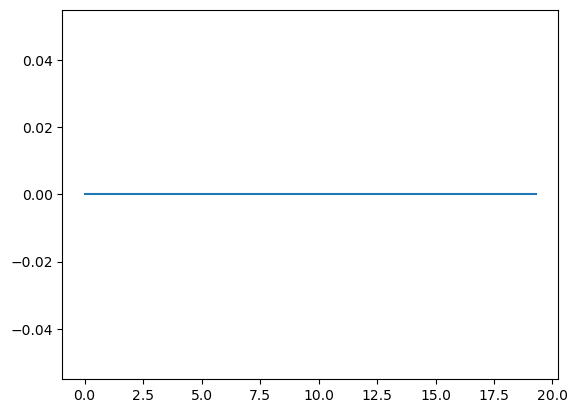

In [166]:
plt.plot(self.zgrid, self.chi2_fit[np.where(self.OBJID == 528)[0][0],:])
print(np.where(self.OBJID == 528.0)[0][0]) # Gives index to look up in Generalized_Namit_Z-Phots.txt

In [124]:
# params['TEMP_ERR_FILE'] = 'C:template_error_10.def'
# self.param['TEMPLATES_FILE'] = 'C:/tweak_fsps_QSF_12_v3_namit.param'

In [18]:
zout, hdu = self.standard_output(simple=False, 
                                 rf_pad_width=0.5, rf_max_err=2, 
                                 prior=True, beta_prior=True, 
                                 absmag_filters=[], 
                                 extra_rf_filters=[])

print(zout)

Get best fit coeffs & best redshifts
fit_best: 0.1 s (n_proc=1,  NOBJ=4)
Get parameters (UBVJ=[153, 154, 155, 161], simple=False)


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 156.97it/s]



 Couldn't find template parameters file C:/tweak_fsps_QSF_12_v3_namit.param.fits for population synthesis 
 calculations.
            
  id   z_spec ...         ssfr_p        
              ...         1 / yr        
----- ------- ... ----------------------
751.0 -9999.0 ... -9.00e+29 .. -9.00e+29
528.0 -9999.0 ... -9.00e+29 .. -9.00e+29
519.0 -9999.0 ... -9.00e+29 .. -9.00e+29
522.0 -9999.0 ... -9.00e+29 .. -9.00e+29


In [19]:
def plot_fit_kevin(object_ID, self, zout, alt_z = 0.0, h5file = False, savefile = None, savesed = False, savechisq = False):

        template_color = '#56B4E9'#'#117733'#'green'
        NIRC_photometry_color = '#D55E00'#'#882255'#'red'
        HST_photometry_color =  '#F786AA'#'#CC6677'#'lightcoral'
        chisq_surface_color = '#E69F00'#'#88CCEE'#'blue'
        zspec_color = '#332288'#'orange'
        alternate_color = 'grey'

        # First, the redshift grid for the chisq surface.
        output_zgrid = np.arange(self.param['Z_MIN'], self.param['Z_MAX'], self.param['Z_STEP'])

        # the index of the source.
        i = np.where(self.OBJID == object_ID)[0][0]

        # the chisq values.
        if (h5file == False):
                output_chisq = self.chi2_fit[i,:]
        else:
                _data = self.get_object_data(i)
                z, fnu_i, efnu_i, ra_i, dec_i, output_chisq, zspec_i, ok_i = _data

        z_a_value = np.round(zout['z_raw_chi2'][i],2)

        data = self.show_fit(object_ID, show_fnu = True, zshow = z_a_value, get_spec = True)

        output_wavelength = data['templz']
        output_flux = data['templf']*1e3

        output_phot_wavelength = data['pivot']
        output_phot_template = data['model']*1e3

        output_phot_err_template = data['emodel']*1e3

        output_phot = data['fobs']*1e3

        output_phot_err = data['efobs']*1e3

        output_tef = data['tef']

        pos_flux_errors = np.where(output_phot_err > 0)[0]

        plt.figure(figsize = (12, 5))
        plt.subplot(121)
        plt.plot(output_wavelength/1e4, output_flux, color = template_color, lw = 2, zorder = 0, label = 'z = '+str(round(zout['z_raw_chi2'][i],2)))
        plt.scatter(output_phot_wavelength/1e4, output_phot_template, marker = 's', s = 110, edgecolor = template_color, color = 'None', zorder = 5)
        plt.scatter(output_phot_wavelength[pos_flux_errors]/1e4, output_phot[pos_flux_errors], color = NIRC_photometry_color, s = 50, zorder = 10)
        plt.errorbar(output_phot_wavelength[pos_flux_errors]/1e4, output_phot[pos_flux_errors], yerr = output_phot_err[pos_flux_errors], color = 'black', ls = 'None', alpha = 0.4)
        plt.semilogy()
        plt.xlabel('Observed Wavelength ($\mu$m)')
        plt.ylabel('Flux (nJy)')
        plt.xlim(0.3, 5.0)
        pos_fluxes = np.where(output_phot > 0)[0]
        ymin = np.min(output_phot[pos_fluxes]) - (0.4 * np.min(output_phot[pos_fluxes]))
        if (ymin < 0.01):
                ymin = 0.01
        ymax = np.max(output_phot[pos_fluxes]) + (10.0 * np.max(output_phot[pos_fluxes]))
        if (ymax > (100.*np.median(output_phot))):
                ymax = 100.*np.median(output_phot)
        plt.ylim(ymin, ymax)
        plt.title(self.OBJID[i])

        if (alt_z < 0):
                alt_z_value = alt_z * -1.0
                if (zout['z_raw_chi2'][i] > alt_z_value):
                        zgrid_lt_7 = np.where(output_zgrid <= alt_z_value)[0]
                        z_a_lt_7 = np.round(output_zgrid[zgrid_lt_7][np.argmin(output_chisq[zgrid_lt_7])],2)
                        data_zlt_7 = self.show_fit(object_ID, show_fnu = True, zshow = z_a_lt_7, get_spec = True)

                        delta_chisq = output_chisq[np.argmin(output_chisq[zgrid_lt_7])] - output_chisq[np.argmin(output_chisq)]
                        print('Delta chisq = '+str(np.round(delta_chisq,2)))

                        output_wavelength_zlt_7 = data_zlt_7['templz']
                        output_flux_zlt_7 = data_zlt_7['templf']*1e3
                        output_phot_template_zlt_7 = data_zlt_7['model']*1e3

                        plt.plot(output_wavelength_zlt_7/1e4, output_flux_zlt_7, color = alternate_color, lw = 2, zorder = 0, label = 'z = '+str(round(z_a_lt_7,2)), alpha = 0.4)
                else:
                        zgrid_gt_7 = np.where(output_zgrid > alt_z_value)[0]
                        z_a_gt_7 = np.round(output_zgrid[zgrid_gt_7][np.argmin(output_chisq[zgrid_gt_7])],2)
                        data_zgt_7 = self.show_fit(object_ID, show_fnu = True, zshow = z_a_gt_7, get_spec = True)

                        delta_chisq = output_chisq[np.argmin(output_chisq[zgrid_gt_7])] - output_chisq[np.argmin(output_chisq)]
                        print('Delta chisq = -'+str(np.round(delta_chisq,2)))

                        output_wavelength_zgt_7 = data_zgt_7['templz']
                        output_flux_zgt_7 = data_zgt_7['templf']*1e3
                        output_phot_template_zgt_7 = data_zgt_7['model']*1e3

                        plt.plot(output_wavelength_zgt_7/1e4, output_flux_zgt_7, color = alternate_color, lw = 2, zorder = 0, label = 'z = '+str(round(z_a_gt_7,2)), alpha = 0.4)
        if (alt_z > 0):
                alt_z_value = alt_z
                data_zalt = self.show_fit(object_ID, show_fnu = True, zshow = alt_z_value, get_spec = True)

                delta_chisq = output_chisq[np.where(output_zgrid == np.round(alt_z_value,2))[0]] - output_chisq[np.argmin(output_chisq)]
                print('Delta chisq = '+str(np.round(delta_chisq,2)))

                output_wavelength_zalt = data_zalt['templz']
                output_flux_zalt = data_zalt['templf']*1e3
                output_phot_template_zalt = data_zalt['model']*1e3

                plt.plot(output_wavelength_zalt/1e4, output_flux_zalt, color = alternate_color, lw = 2, zorder = 0, label = 'z = '+str(round(alt_z_value,2)), alpha = 0.4)


        plt.legend()

        plt.subplot(122)
        plt.plot(output_zgrid, output_chisq, color = chisq_surface_color, lw = 3, zorder = 10)
        plt.axvline(zout['z_raw_chi2'][i], lw = 3, zorder = 0)
        if (alt_z < 0):
                if (zout['z_raw_chi2'][i] > 7.0):
                        plt.axvline(z_a_lt_7, color = alternate_color, lw = 3, alpha = 0.4, zorder = 0)
                else:
                        plt.axvline(z_a_gt_7, color = alternate_color, lw = 3, alpha = 0.4, zorder = 0)
        if (alt_z > 0):
                plt.axvline(alt_z_value, color = alternate_color, lw = 3, alpha = 0.4, zorder = 0)

        plt.xlabel('Redshift')
        plt.ylabel('$\chi^2$')
        #plt.title('z = '+str(zout['z_raw_chi2'][i]))
        plt.tight_layout()
        if (savefile == None):
                plt.show()
        else:
                plt.savefig(savefile, dpi = 300)

        if (savesed == True):
                np.savetxt(str(object_ID)+'_wave_sed.dat', np.c_[output_wavelength/1e4, output_flux])
                np.savetxt(str(object_ID)+'_wave_sed_photometry.dat', np.c_[output_phot_wavelength/1e4, output_phot_template])

        if (savechisq == True):
                np.savetxt(str(object_ID)+'_z_chisq.dat', np.c_[output_zgrid, output_chisq])


ValueError: x and y must have same first dimension, but have shapes (400,) and (61,)

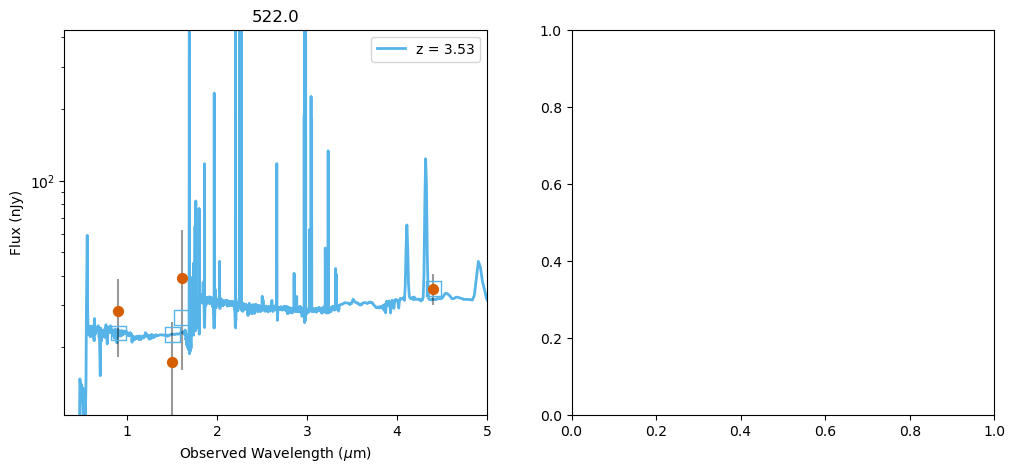

In [20]:
plot_fit_kevin(522, self, zout)